In [ ]:
!pip install pycaret

     |████████████████████████████████| 264 kB 29.7 MB/s 
     |████████████████████████████████| 6.8 MB 34.8 MB/s 
     |████████████████████████████████| 248 kB 68.9 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 108 kB 47.1 MB/s 
     |████████████████████████████████| 167 kB 44.8 MB/s 
     |████████████████████████████████| 2.0 MB 41.7 MB/s 
     |████████████████████████████████| 80 kB 4.6 MB/s 
     |████████████████████████████████| 1.7 MB 25.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 35.8 MB/s 
     |████████████████████████████████| 271 kB 56.0 MB/s 
     |████████████████████████████████| 14.4 MB 53 kB/s 
     |████████████████████████████████| 62 kB 815 kB/s 
     |████████████████████████████████| 102 kB 47.8 MB/s 
     |████████████████████

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.drop_duplicates(keep="first",inplace=True,ignore_index=True)

In [ ]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
 data.dropna(subset=['output'],axis=0,how='any')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
corr = data.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


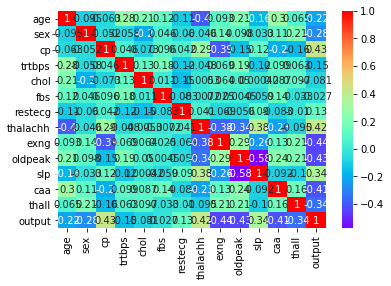

In [ ]:
sns.heatmap(corr,annot=True,cmap="rainbow")

In [ ]:
X = data.drop(['output'], axis=1)
y = data['output']

In [ ]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: output, Length: 302, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
y_train.value_counts()

1    131
0    110
Name: output, dtype: int64

In [ ]:
y_test.value_counts()

1    33
0    28
Name: output, dtype: int64

In [ ]:
train = pd.merge(x_train,y_train,left_index=True,right_index=True).reset_index(drop=True)

In [ ]:
test = pd.merge(x_test,y_test,left_index=True,right_index=True).reset_index(drop=True)

In [ ]:
from pycaret.classification import setup


In [ ]:
preprocessed_data =setup(data = train, target = 'output',test_data=test, session_id=11,
                         numeric_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall'],
                  normalize=True,transformation=True,
                  remove_multicollinearity=True,
                  remove_outliers=True,
                  categorical_imputation="mode",
                  ignore_low_variance=True,
                  data_split_stratify=True,                                 
                  use_gpu=True)

,Description,Value
0,session_id,11
1,Target,output
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(241, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
from pycaret.classification import compare_models,create_model,tune_model,finalize_model,save_model,predict_model,load_model

In [ ]:
compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm','rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8253,0.9208,0.8571,0.8410,0.8438,0.6432,0.6534,0.014
lr,Logistic Regression,0.8125,0.9045,0.8731,0.8095,0.8357,0.6146,0.6263,0.023
knn,K Neighbors Classifier,0.8081,0.8724,0.8814,0.8026,0.8369,0.6024,0.6135,0.182
rbfsvm,SVM - Radial Kernel,0.7864,0.8900,0.8327,0.7997,0.8089,0.5616,0.5761,0.023
rf,Random Forest Classifier,0.7862,0.9047,0.8160,0.8058,0.8050,0.5633,0.5741,0.967
dt,Decision Tree Classifier,0.7644,0.7555,0.8256,0.7782,0.7941,0.5166,0.5334,0.015
svm,SVM - Linear Kernel,0.7555,0.0000,0.7724,0.7790,0.7683,0.5092,0.5173,0.014


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb??

Object `nb` not found.


In [ ]:
from pycaret.classification import plot_model

In [ ]:
nb = create_model('nb',fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
1,0.7500,0.8889,0.8333,0.7143,0.7692,0.5000,0.5071
2,0.8333,0.8857,0.7143,1.0000,0.8333,0.6757,0.7143
3,0.8333,0.8857,0.7143,1.0000,0.8333,0.6757,0.7143
4,0.9167,1.0000,0.8571,1.0000,0.9231,0.8333,0.8452
5,0.7500,0.9143,1.0000,0.7000,0.8235,0.4375,0.5292
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9167,0.8571,1.0000,0.8750,0.9333,0.8235,0.8367
8,0.8333,0.8571,0.8571,0.8571,0.8571,0.6571,0.6571
9,0.9091,1.0000,0.8333,1.0000,0.9091,0.8197,0.8333


In [ ]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
tuned_model = tune_model(nb,
                         choose_better=True,tuner_verbose=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7826,0.9167,0.7500,0.8182,0.7826,0.5660,0.5682
1,0.8696,0.9242,0.7500,1.0000,0.8571,0.7416,0.7676
2,0.7826,0.9308,0.8462,0.7857,0.8148,0.5525,0.5548
3,0.9565,0.9615,1.0000,0.9286,0.9630,0.9105,0.9142
4,0.8696,0.9231,0.9231,0.8571,0.8889,0.7315,0.7345
5,0.8696,0.9462,0.8462,0.9167,0.8800,0.7376,0.7405
6,0.7391,0.7769,0.6923,0.8182,0.7500,0.4812,0.4886
7,0.8696,0.9385,1.0000,0.8125,0.8966,0.7251,0.7542
8,0.6957,0.9154,0.8462,0.6875,0.7586,0.3586,0.3729
9,0.8182,0.9750,0.9167,0.7857,0.8462,0.6271,0.6383


In [ ]:
tuned_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
final = finalize_model(tuned_model)

In [ ]:
final

GaussianNB(priors=None, var_smoothing=1e-09)

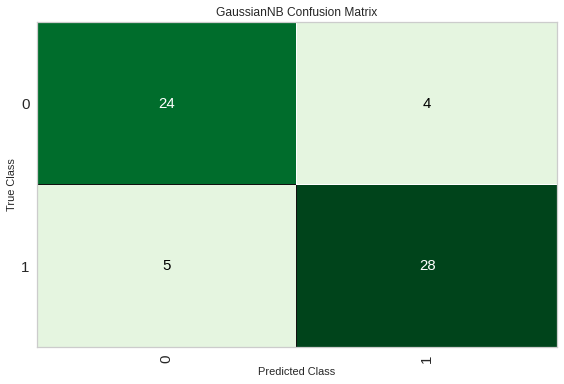

In [ ]:
plot_model(final,plot="confusion_matrix")

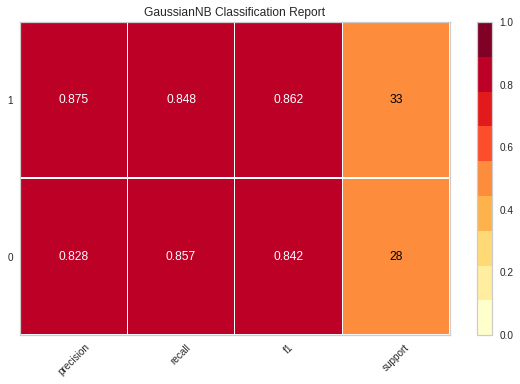

In [ ]:
plot_model(final,plot="class_report")

In [ ]:
save_model(final,'Final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['sex', 'cp', 'fbs',
                                                           'restecg', 'exng',
                                                           'slp', 'caa',
                                                           'thall'],
                                       target='output', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_cate...
                 ('fix_perfect', Remove_100(target='output')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'pa

In [ ]:
model=load_model('Final_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
pip install streamlit

     |████████████████████████████████| 8.0 MB 26.2 MB/s 
     |████████████████████████████████| 4.2 MB 29.7 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 111 kB 66.4 MB/s 
     |████████████████████████████████| 122 kB 43.9 MB/s 
     |████████████████████████████████| 786 kB 36.9 MB/s 
     |████████████████████████████████| 370 kB 51.8 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=8c38f24816c19f55040fd1693917f49272d30624e94f55b46811266ad6393786
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successf

In [ ]:
pip install ipykernel==4.10

     |████████████████████████████████| 109 kB 35.7 MB/s 
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.2.0
    Uninstalling ipykernel-6.2.0:
      Successfully uninstalled ipykernel-6.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydeck 0.6.2 requires ipykernel>=5.1.2; python_version >= "3.4", but you have ipykernel 4.10.0 which is incompatible.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.20 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.26.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.


In [ ]:
import streamlit

In [ ]:
pip install pyngrok

     |████████████████████████████████| 746 kB 33.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.6-py3-none-any.whl size=19262 sha256=4b7600e005287e520949a6b303fb147f9dc641f8f790ed07576c33d1467dc1dc
  Stored in directory: /root/.cache/pip/wheels/d5/8c/c4/8d9cbca4fa19bf64887b4a91914194bb9033f1a7cbb344d5ab
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='80')
print (public_url)

2021-08-25 04:29:47.004 INFO    pyngrok.ngrok: Opening tunnel named: http-80-61a9582a-0220-413c-bbac-656414f158e6


2021-08-25 04:29:47.785 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="no configuration paths supplied"
2021-08-25 04:29:47.787 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-08-25 04:29:47.793 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-08-25 04:29:47.802 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-08-25 04:29:47.860 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-08-25 04:29:47.863 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="client session established" obj=csess id=d99324e5cf73
2021-08-25 04:29:47.872 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg=start pg=/api/tunnel

NgrokTunnel: "http://8ab4-35-221-4-183.ngrok.io" -> "http://localhost:80"


2021-08-25 04:29:47.921 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="started tunnel" obj=tunnels name="http-80-61a9582a-0220-413c-bbac-656414f158e6 (http)" addr=http://localhost:80 url=http://8ab4-35-221-4-183.ngrok.io
2021-08-25 04:29:47.925 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg="started tunnel" obj=tunnels name=http-80-61a9582a-0220-413c-bbac-656414f158e6 addr=http://localhost:80 url=https://8ab4-35-221-4-183.ngrok.io
2021-08-25 04:29:47.928 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg=end pg=/api/tunnels id=ada7352a95a7e98b status=201 dur=41.542223ms
2021-08-25 04:29:47.932 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg=start pg="/api/tunnels/http-80-61a9582a-0220-413c-bbac-656414f158e6 (http)" id=8c7b7fcd3d6c6f79
2021-08-25 04:29:47.933 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:47+0000 lvl=info msg=end pg="/api/tunnels/http-80-61a9582a-0220-413c-bbac-656414f158e6 (h

In [ ]:
!streamlit run --server.port 80 heart-disease-streamlit.py >/dev/null

2021-08-25 04:29:54.560 NumExpr defaulting to 2 threads.
2021-08-25 04:29:54.985 Initializing load_model()
2021-08-25 04:29:54.986 load_model(model_name=Final_model, platform=None, authentication=None, verbose=True)


2021-08-25 04:29:56.867 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:56+0000 lvl=info msg="join connections" obj=join id=40e899ec2828 l=127.0.0.1:80 r=[2401:4900:264a:fbea:886b:b6e2:6e7d:a4b8]:55918
2021-08-25 04:29:57.274 INFO    pyngrok.process.ngrok: t=2021-08-25T04:29:57+0000 lvl=info msg="join connections" obj=join id=23efba7d75db l=127.0.0.1:80 r=[2401:4900:264a:fbea:886b:b6e2:6e7d:a4b8]:55918
2021-08-25 04:30:02.965 INFO    pyngrok.process.ngrok: t=2021-08-25T04:30:02+0000 lvl=info msg="join connections" obj=join id=f3e9940a86d9 l=127.0.0.1:80 r=223.228.183.141:6322


2021-08-25 04:30:23.617 Initializing load_model()
2021-08-25 04:30:23.618 load_model(model_name=Final_model, platform=None, authentication=None, verbose=True)
2021-08-25 04:30:25.541 Initializing load_model()
2021-08-25 04:30:25.541 load_model(model_name=Final_model, platform=None, authentication=None, verbose=True)
2021-08-25 04:30:27.584 Initializing load_model()
2021-08-25 04:30:27.585 load_model(model_name=Final_model, platform=None, authentication=None, verbose=True)
2021-08-25 04:30:29.629 Initializing load_model()
2021-08-25 04:30:29.630 load_model(model_name=Final_model, platform=None, authentication=None, verbose=True)
2021-08-25 04:30:31.671 Initializing load_model()
2021-08-25 04:30:31.671 load_model(model_name=Final_model, platform=None, authentication=None, verbose=True)
2021-08-25 04:30:33.748 Initializing load_model()
2021-08-25 04:30:33.748 load_model(model_name=Final_model, platform=None, authentication=None, verbose=True)
2021-08-25 04:30:35.839 Initializing load_mode

2021-08-25 04:45:25.674 INFO    pyngrok.process.ngrok: t=2021-08-25T04:45:25+0000 lvl=info msg="join connections" obj=join id=dfa056c2c9e0 l=127.0.0.1:80 r=223.228.183.141:19751
2021-08-25 04:45:41.606 INFO    pyngrok.process.ngrok: t=2021-08-25T04:45:41+0000 lvl=info msg="join connections" obj=join id=7118307066a6 l=127.0.0.1:80 r=[2401:4900:264a:fbea:a861:2988:3bb7:6751]:56002
